In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy
import json
from dataset_loader import load_data, generate_set

with open("settings.json", "r", encoding='utf-8') as f:
    data = json.loads(f.read())

train_data, train_labels, test_data, test_labels = load_data(data["dataset_dir"])
train_data, train_labels = generate_set(train_data, train_labels, data["train_set_length"])
test_data, test_labels = generate_set(test_data, test_labels, data["train_set_length"])

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 64, 6)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 62, 32)       1760      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 12, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 21504)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [2]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
250/250 [==============================] - 37s 148ms/step - loss: 0.5724 - accuracy: 0.6976 - val_loss: 0.4992 - val_accuracy: 0.7525
Epoch 2/10
250/250 [==============================] - 42s 168ms/step - loss: 0.4395 - accuracy: 0.8006 - val_loss: 0.4767 - val_accuracy: 0.7843
Epoch 3/10
250/250 [==============================] - 44s 174ms/step - loss: 0.3966 - accuracy: 0.8216 - val_loss: 0.4092 - val_accuracy: 0.8181
Epoch 4/10
250/250 [==============================] - 45s 180ms/step - loss: 0.3539 - accuracy: 0.8481 - val_loss: 0.4013 - val_accuracy: 0.8221
Epoch 5/10
250/250 [==============================] - 38s 153ms/step - loss: 0.3090 - accuracy: 0.8679 - val_loss: 0.4425 - val_accuracy: 0.8025
Epoch 6/10
250/250 [==============================] - 36s 145ms/step - loss: 0.2570 - accuracy: 0.8945 - val_loss: 0.4349 - val_accuracy: 0.8254
Epoch 7/10
250/250 [==============================] - 39s 156ms/step - loss: 0.1893 - accuracy: 0.9240 - val_loss: 0.4781 - val_ac

250/250 - 6s - loss: 0.7697 - accuracy: 0.8016


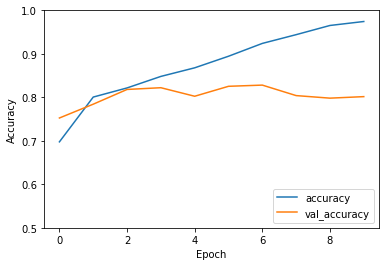

In [3]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

In [4]:
from PIL import Image
import numpy as np
image = Image.open("/Users/bluesky/Downloads/Market-1501-v15.09.15/bounding_box_test/0618_c3s2_020387_03.jpg")
image2 = Image.open("/Users/bluesky/Downloads/Market-1501-v15.09.15/bounding_box_test/0618_c3s2_020362_03.jpg")
d1 = np.array(image)/255.0
d2 = np.array(image2)/255.0
data = np.append(d1,d2,axis = 2)
data = np.expand_dims(data, axis=0)
result = model.predict(data)
print(result)

[[-3.3745992  1.6121254]]
